# Exercise 1

We first load a dataset and examine its dimensions.

In [ ]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import math
import numpy as np

xy_data = np.load('/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

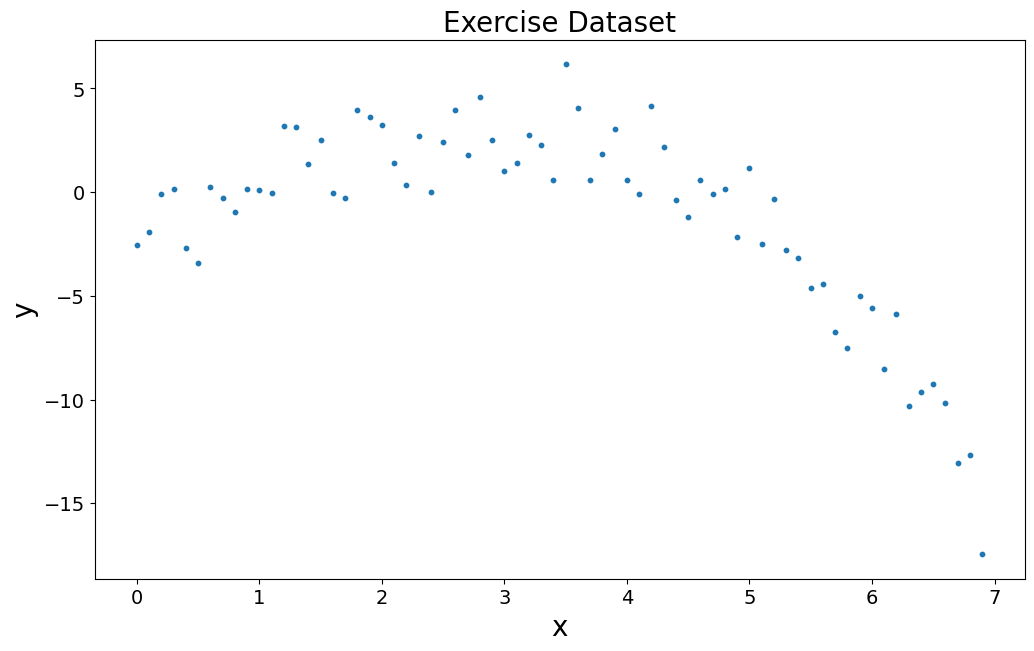

In [ ]:
import matplotlib.pyplot as plt

# Your code for scatterplot here

xs = xy_data[:,0]  # First column of array 
ys = xy_data[:,1]  # Second column of array


# Set parameters to make sure figures are large enough
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.scatter(xs, ys, s=10)   # s can be used to adjust the size of the dots
plt.xlabel('x')
plt.ylabel('y')
plt.title('Exercise Dataset')
plt.savefig('xy_dataset.pdf', bbox_inches = 'tight')
plt.show()


### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [ ]:
def polyreg(data_matrix, k):
    # Your code here
    # The function should return the the coefficient vector beta, the fit, and the vector of residuals
    
    xs = data_matrix[:,0]  # First column of array 
    ys = data_matrix[:,1]  # Second column of array

    n = np.shape(xs)

    # Define matrix X and vector Y
    yvalues = ys
    X  = np.ones((n[0],1))
    if k <= n[0]:
      for i in range(1,k+1):
        X = np.c_[X, xs**i]
    else: 
      for i in range(1, n[0]+1):
        X = np.c_[X, xs**i]
      for j in range(n[0]+1, k):
        X = np.c_[X, np.zeros(n)]
    print('The dimensions of X are',np.shape(X))

    # Computing the coefficient vector beta* using least squares formula
    beta = np.linalg.lstsq(X, yvalues, rcond=None)[0] 
    fit = X.dot(beta) 
    resid = yvalues - fit

    # Return the coefficient vector, fit, residuals
    return(beta, fit, resid)

    '''
    plt.rcParams['figure.figsize'] = [12, 7]
    plt.scatter(xs, ys, s=10, color = 'cyan', label = 'Data')   
    plt.plot(xs, fit, color = 'red', label = 'Polynomial fit')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Polynomial Fit To A Dataset')
    plt.legend(fontsize = 'large')
    plt.savefig('dataset_polynomial_fit.pdf', bbox_inches = 'tight')
    plt.show()

    # Computing the sum of squared errors
    SSE = np.linalg.norm(yvalues - fit)**2
    MSE = SSE/(np.size(yvalues))
    print('SSE = ', np.round_(SSE, 2), ' \t MSE = ', np.round_(MSE, 2))

    plt.rcParams['figure.figsize'] = [10, 5]
    plt.scatter(xs, resid, s=10)
    plt.title('Residuals for the polynomial model')
    plt.savefig('polynomial_resid.png', bbox_inches = 'tight')
    plt.show()

    print('Mean of residuals for polynomial model = ', np.round(np.mean(resid), 3), 
      'Variance of residuals = ', np.round(np.var(resid),3)) 

    # Plot normed histogram of the residuals
    n, bins, patches = plt.hist(resid, bins=20, density=True, facecolor='green');

    # Plot Gaussian pdf with same mean and variance as the residuals
    from scipy.stats import norm
    res_stdev = np.std(resid)  #standard deviation of residuals
    xvals = np.linspace(-3*res_stdev,3*res_stdev,1000)
    plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_stdev), 'r')
    plt.show()
    '''

Use the tests below to check the outputs of the function you have written:

In [ ]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0]
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

The dimensions of X are (21, 3)
The dimensions of X are (21, 1)
The dimensions of X are (21, 1)


### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

The dimensions of X are (70, 3)
The dimensions of X are (70, 4)
The dimensions of X are (70, 5)


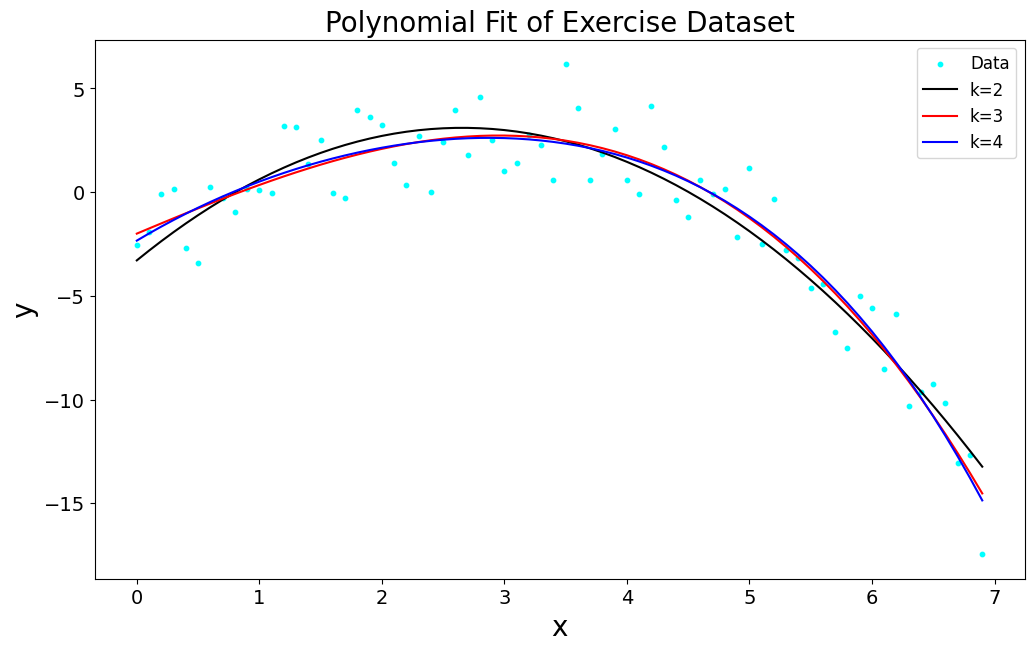

SSE2 =  172.18  	 MSE2 =  2.46
SSE3 =  152.41  	 MSE3 =  2.18
SSE4 =  151.23  	 MSE4 =  2.16
R^2 for the k=2 =  0.8876
R^2 for the k=3 =  0.9005
R^2 for the k=4 =  0.9013


In [ ]:
#Your code here

# Compute and Plot fits
all_ones = np.ones(np.shape(xs))
fit0 = np.mean(ys)*all_ones 
fit2 = polyreg(xy_data, k=2)[1]
fit3 = polyreg(xy_data, k=3)[1]
fit4 = polyreg(xy_data, k=4)[1]

plt.rcParams['figure.figsize'] = [12, 7]
plt.scatter(xs, ys, s=10, color = 'cyan', label = 'Data')   
plt.plot(xs, fit2, color = 'black', label = 'k=2')
plt.plot(xs, fit3, color = 'red', label = 'k=3')
plt.plot(xs, fit4, color = 'blue', label = 'k=4')  
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Fit of Exercise Dataset')
plt.legend(fontsize = 'large')
plt.savefig('polynomial_fit_of_xy_dataset.pdf', bbox_inches = 'tight')
plt.show()

# Compute SSE and R squared
SSE0 = np.linalg.norm(ys - fit0)**2
SSE2 = np.linalg.norm(ys - fit2)**2
SSE3 = np.linalg.norm(ys - fit3)**2
SSE4 = np.linalg.norm(ys - fit4)**2
MSE0 = SSE0/(np.size(ys))
MSE2 = SSE2/(np.size(ys))
MSE3 = SSE3/(np.size(ys))
MSE4 = SSE4/(np.size(ys))
print('SSE2 = ', np.round_(SSE2, 2), ' \t MSE2 = ', np.round_(MSE2, 2))  
print('SSE3 = ', np.round_(SSE3, 2), ' \t MSE3 = ', np.round_(MSE3, 2))
print('SSE4 = ', np.round_(SSE4, 2), ' \t MSE4 = ', np.round_(MSE4, 2))
print('R^2 for the k=2 = ', np.round_(1- SSE2/SSE0, decimals = 4))
print('R^2 for the k=3 = ', np.round_(1- SSE3/SSE0, decimals = 4))
print('R^2 for the k=4 = ', np.round_(1- SSE4/SSE0, decimals = 4))


 #### State which model you choose and briefly justify your choice.
 
 
 I'll choose the model of k=4, because it has the least SSE and MSE, and the largest R^2, meaning it's the best fit of the three.
 
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

The dimensions of X are (70, 5)


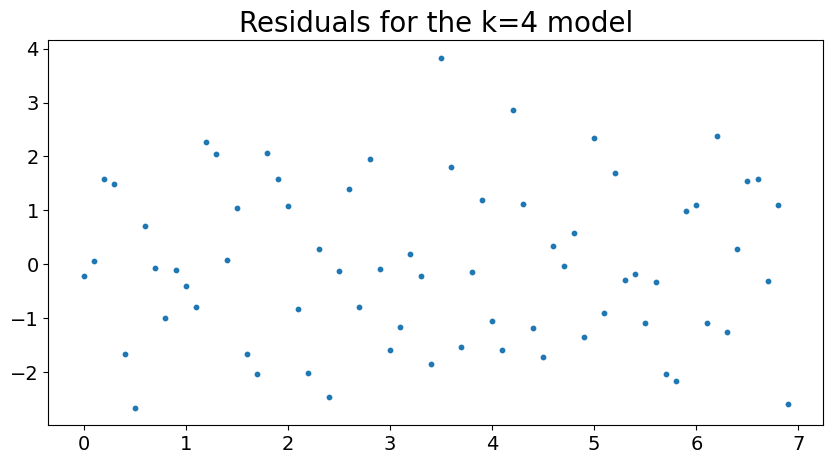

Mean of residuals for the model =  -0.0 Variance of residuals =  2.16


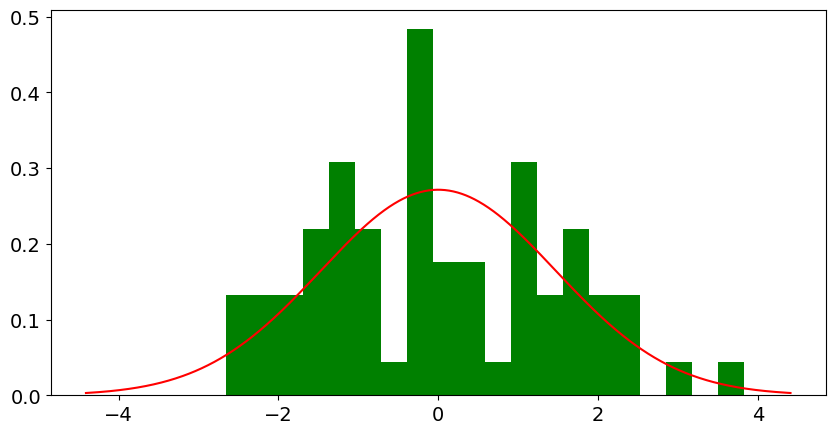

In [ ]:
#Your code here

resid4 = polyreg(xy_data, k=4)[2]
plt.rcParams['figure.figsize'] = [10, 5]
plt.scatter(xs, resid4, s=10)
plt.title('Residuals for the k=4 model')
plt.savefig('fourth_order_resid.png', bbox_inches = 'tight')
plt.show()

print('Mean of residuals for the model = ', np.round(np.mean(resid4), 3), 
      'Variance of residuals = ', np.round(np.var(resid4),3)) 

# Plot normed histogram of the residuals
n, bins, patches = plt.hist(resid4, bins=20, density=True, facecolor='green');

# Plot Gaussian pdf with same mean and variance as the residuals
from scipy.stats import norm
res_quad_stdev = np.std(resid4)  #standard deviation of residuals
xvals = np.linspace(-3*res_quad_stdev,3*res_quad_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_quad_stdev), 'r')
plt.show()